# "Predicting Majority Electoral Vote with Machine Learning"

## McKenzie Skrastins, Kristina Donders, and Batia Rabin

### Submission for Binghamton Codes! X DiDa Mini Hackathon at Binghamton University

#### 11/14/25 - 11/15/25

[Presentation](https://docs.google.com/presentation/d/1c9dIvLE3F2Mx3Tn9X3jVn3NBVLQeT1evCX8y_jj8QjI/edit?usp=sharing)
____________________________________________________________________________________________________

## Importing libraries & dataset

[Dataset - County Presidential Election Returns 2000-2024’ from the MIT Election & Science Lab](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("countypres_2000-2024.csv")

In [3]:
df.head()

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,AL GORE,DEMOCRAT,4942,17208,20250821,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993,17208,20250821,TOTAL
2,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,OTHER,OTHER,113,17208,20250821,TOTAL
3,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,RALPH NADER,GREEN,160,17208,20250821,TOTAL
4,2000,ALABAMA,AL,BALDWIN,1003.0,US PRESIDENT,AL GORE,DEMOCRAT,13997,56480,20250821,TOTAL


## Data Cleaning

In [4]:
df2 = df.copy()

In [5]:
# extracting the relevant columns for analysis into a new dataframe

x = df2.groupby(['year', 'candidate', 'state_po', 'party', 'county_fips'])['candidatevotes'].sum()
x = x.reset_index()
y = pd.DataFrame(x)
y.head(3000)

,year,candidate,state_po,party,county_fips,candidatevotes
0,2000,AL GORE,AK,DEMOCRAT,2001.0,1284
1,2000,AL GORE,AK,DEMOCRAT,2002.0,2081
2,2000,AL GORE,AK,DEMOCRAT,2003.0,3693
3,2000,AL GORE,AK,DEMOCRAT,2004.0,2715
4,2000,AL GORE,AK,DEMOCRAT,2005.0,1931
...,...,...,...,...,...,...
2995,2000,AL GORE,WA,DEMOCRAT,53061.0,129612
2996,2000,AL GORE,WA,DEMOCRAT,53063.0,74604
2997,2000,AL GORE,WA,DEMOCRAT,53065.0,5560
2998,2000,AL GORE,WA,DEMOCRAT,53067.0,50467


In [6]:
# making a new column 'result' to input which candidate won each election, grouped by county, state, and year
y['result'] = ' '
y.head()

,year,candidate,state_po,party,county_fips,candidatevotes,result
0,2000,AL GORE,AK,DEMOCRAT,2001.0,1284,
1,2000,AL GORE,AK,DEMOCRAT,2002.0,2081,
2,2000,AL GORE,AK,DEMOCRAT,2003.0,3693,
3,2000,AL GORE,AK,DEMOCRAT,2004.0,2715,
4,2000,AL GORE,AK,DEMOCRAT,2005.0,1931,


In [7]:
# Undervotes and Overvotes were candidate options during the 2024 election. Because they were only in the 2024 election, we removed them
y_filtered = y[~y.iloc[:, 1].isin(['UNDERVOTES', 'OVERVOTES'])]

In [8]:
y_filtered = y_filtered.reset_index()

In [9]:
y_filtered = y_filtered.drop(columns = ['index'])
y_filtered.head()

,year,candidate,state_po,party,county_fips,candidatevotes,result
0,2000,AL GORE,AK,DEMOCRAT,2001.0,1284,
1,2000,AL GORE,AK,DEMOCRAT,2002.0,2081,
2,2000,AL GORE,AK,DEMOCRAT,2003.0,3693,
3,2000,AL GORE,AK,DEMOCRAT,2004.0,2715,
4,2000,AL GORE,AK,DEMOCRAT,2005.0,1931,


In [10]:
# determining the total number of candidate votes grouped by county, state, and year
x = y.groupby(['county_fips', 'state_po', 'year'])['candidatevotes'].max()
x = pd.DataFrame(x)

fina_df = pd.merge(x, y, on = ['county_fips', 'year'])

In [11]:
print(x)

                            candidatevotes
county_fips  state_po year                
1.001000e+03 AL       2000           11993
                      2004           15196
                      2008           17403
                      2012           17379
                      2016           18172
...                                    ...
4.400950e+09 RI       2024             661
4.400952e+09 RI       2024           10145
4.400961e+09 RI       2024            2493
4.400967e+09 RI       2024           10749
4.400977e+09 RI       2024            6653

[22117 rows x 1 columns]


In [12]:
fina_df

,county_fips,year,candidatevotes_x,candidate,state_po,party,candidatevotes_y,result
0,1.001000e+03,2000,11993,AL GORE,AL,DEMOCRAT,4942,
1,1.001000e+03,2000,11993,GEORGE W. BUSH,AL,REPUBLICAN,11993,
2,1.001000e+03,2000,11993,OTHER,AL,OTHER,113,
3,1.001000e+03,2000,11993,RALPH NADER,AL,GREEN,160,
4,1.001000e+03,2004,15196,GEORGE W. BUSH,AL,REPUBLICAN,15196,
...,...,...,...,...,...,...,...,...
77002,4.400967e+09,2024,10749,OTHER,RI,OTHER,482,
77003,4.400977e+09,2024,6653,CHASE OLIVER,RI,LIBERTARIAN,38,
77004,4.400977e+09,2024,6653,DONALD J TRUMP,RI,REPUBLICAN,5664,
77005,4.400977e+09,2024,6653,KAMALA D HARRIS,RI,DEMOCRAT,6653,


In [13]:
fina_df['total_votes_of_winner'] = fina_df['candidatevotes_x']
fina_df['candidatevotes'] = fina_df['candidatevotes_y']

fina_df = fina_df.drop(columns = ['candidatevotes_y', 'candidatevotes_x'])

In [14]:
fina_df

,county_fips,year,candidate,state_po,party,result,total_votes_of_winner,candidatevotes
0,1.001000e+03,2000,AL GORE,AL,DEMOCRAT,,11993,4942
1,1.001000e+03,2000,GEORGE W. BUSH,AL,REPUBLICAN,,11993,11993
2,1.001000e+03,2000,OTHER,AL,OTHER,,11993,113
3,1.001000e+03,2000,RALPH NADER,AL,GREEN,,11993,160
4,1.001000e+03,2004,GEORGE W. BUSH,AL,REPUBLICAN,,15196,15196
...,...,...,...,...,...,...,...,...
77002,4.400967e+09,2024,OTHER,RI,OTHER,,10749,482
77003,4.400977e+09,2024,CHASE OLIVER,RI,LIBERTARIAN,,6653,38
77004,4.400977e+09,2024,DONALD J TRUMP,RI,REPUBLICAN,,6653,5664
77005,4.400977e+09,2024,KAMALA D HARRIS,RI,DEMOCRAT,,6653,6653


In [15]:
fina_df['result'] = (fina_df['total_votes_of_winner'] == fina_df['candidatevotes']).astype(int)

In [16]:
final_df = fina_df.drop(columns = 'total_votes_of_winner')

In [17]:
final_df

,county_fips,year,candidate,state_po,party,result,candidatevotes
0,1.001000e+03,2000,AL GORE,AL,DEMOCRAT,0,4942
1,1.001000e+03,2000,GEORGE W. BUSH,AL,REPUBLICAN,1,11993
2,1.001000e+03,2000,OTHER,AL,OTHER,0,113
3,1.001000e+03,2000,RALPH NADER,AL,GREEN,0,160
4,1.001000e+03,2004,GEORGE W. BUSH,AL,REPUBLICAN,1,15196
...,...,...,...,...,...,...,...
77002,4.400967e+09,2024,OTHER,RI,OTHER,0,482
77003,4.400977e+09,2024,CHASE OLIVER,RI,LIBERTARIAN,0,38
77004,4.400977e+09,2024,DONALD J TRUMP,RI,REPUBLICAN,0,5664
77005,4.400977e+09,2024,KAMALA D HARRIS,RI,DEMOCRAT,1,6653


In [18]:
test_df = final_df.copy()

In [19]:
test_df = test_df.drop(columns = 'candidatevotes')

In [20]:
# our final dataset!
test_df

,county_fips,year,candidate,state_po,party,result
0,1.001000e+03,2000,AL GORE,AL,DEMOCRAT,0
1,1.001000e+03,2000,GEORGE W. BUSH,AL,REPUBLICAN,1
2,1.001000e+03,2000,OTHER,AL,OTHER,0
3,1.001000e+03,2000,RALPH NADER,AL,GREEN,0
4,1.001000e+03,2004,GEORGE W. BUSH,AL,REPUBLICAN,1
...,...,...,...,...,...,...
77002,4.400967e+09,2024,OTHER,RI,OTHER,0
77003,4.400977e+09,2024,CHASE OLIVER,RI,LIBERTARIAN,0
77004,4.400977e+09,2024,DONALD J TRUMP,RI,REPUBLICAN,0
77005,4.400977e+09,2024,KAMALA D HARRIS,RI,DEMOCRAT,1


## Preliminary Data Visualization

In [21]:
states = final_df.groupby(['year', 'state_po', 'candidate', 'party'])['candidatevotes'].sum()
states = pd.DataFrame(states)
states = states.reset_index()

In [22]:
years = final_df.groupby(['year', 'candidate', 'party'])['candidatevotes'].sum()
years = pd.DataFrame(years)
years = years.reset_index()

In [23]:
import matplotlib.pyplot as plt
import numpy as np

In [24]:
years_dict = {2000:{"candidates":[], "parties":[], "votes":[], "colors":[], "explode":[0.05, 0, 0, 0]},
              2004:{"candidates":[], "parties":[], "votes":[], "colors":[], "explode":[0.05, 0, 0]},
              2008:{"candidates":[], "parties":[], "votes":[], "colors":[], "explode":[0.05, 0, 0]},
              2012:{"candidates":[], "parties":[], "votes":[], "colors":[], "explode":[0.05, 0, 0]},
              2016:{"candidates":[], "parties":[], "votes":[], "colors":[], "explode":[0, 0.05, 0]},
              2020:{"candidates":[], "parties":[], "votes":[], "colors":[], "explode":[0, 0, 0.05, 0, 0]},
              2024:{"candidates":[], "parties":[], "votes":[], "colors":[], "explode":[0, 0.05, 0, 0]}}

for i, row in years.iterrows():
  for x in years_dict:
    if row[0] == x and (row[1] != "OVERVOTES" and row[1] != "UNDERVOTES"):
      years_dict[x]["candidates"].append(row[1])
      years_dict[x]["parties"].append(row[2])
      years_dict[x]["votes"].append(row[3])
      if row[2] == "DEMOCRAT":
        years_dict[x]["colors"].append("CornflowerBlue")
      elif row[2] == "REPUBLICAN":
        years_dict[x]["colors"].append("Crimson")
      elif row[2] == "GREEN":
        years_dict[x]["colors"].append("DarkGreen")
      elif row[2] == "LIBERTARIAN":
        years_dict[x]["colors"].append("DarkGray")
      else:
        years_dict[x]["colors"].append("BurlyWood")

/tmp/ipython-input-3817482385.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] == x and (row[1] != "OVERVOTES" and row[1] != "UNDERVOTES"):
/tmp/ipython-input-3817482385.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  years_dict[x]["candidates"].append(row[1])
/tmp/ipython-input-3817482385.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  years_dict[x]["parties"].append(row[2])
/tmp/ipython-input-3817482385.py:

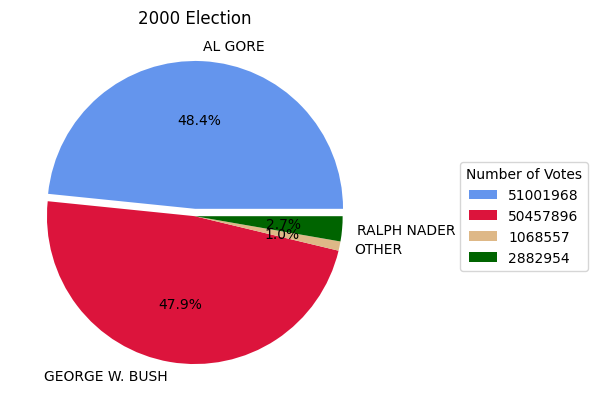

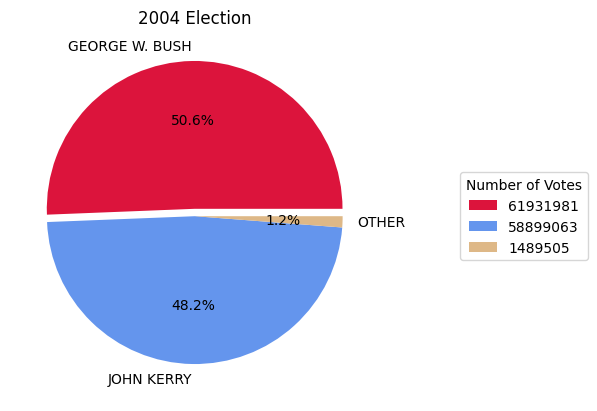

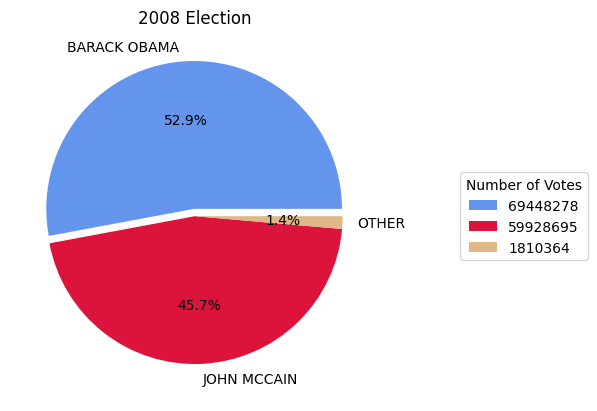

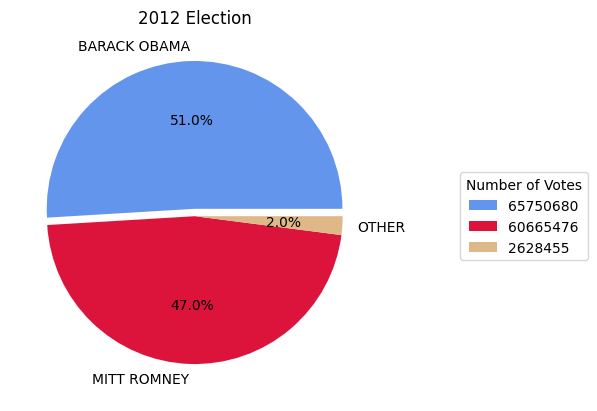

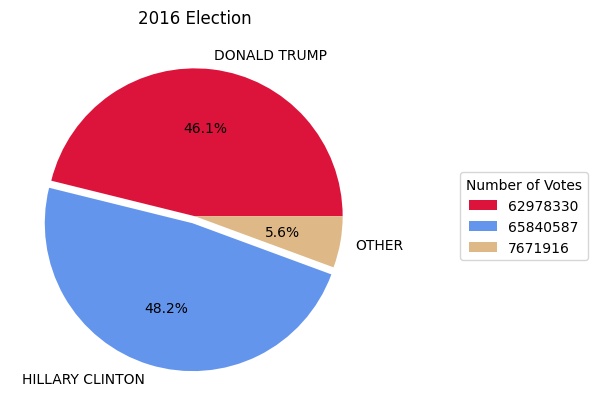

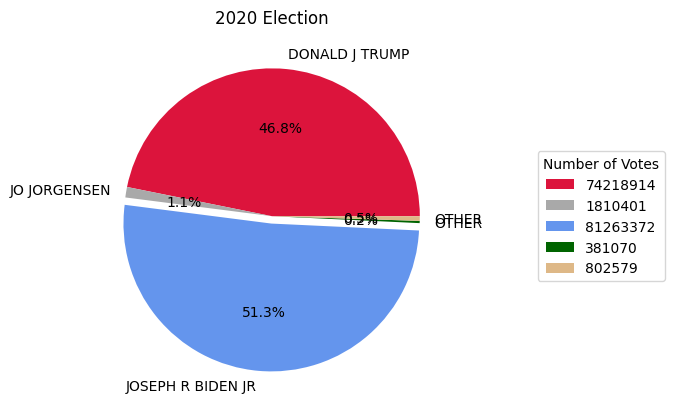

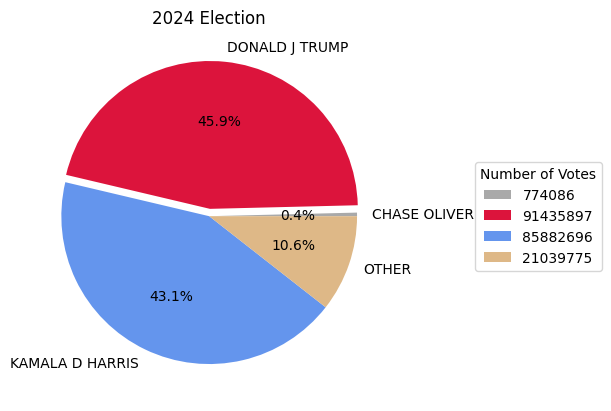

In [25]:
for x in years_dict:
  fig, ax = plt.subplots()
  ax.set_title(f"{x} Election")
  ax.pie(years_dict[x]["votes"],
         labels= years_dict[x]["candidates"],
         colors=years_dict[x]["colors"],
         explode=years_dict[x]["explode"],
         autopct='%1.1f%%')
  # ax.legend(years_dict[x]["parties"],
  #           title = "Parties",
  #           loc="center left",
  #           bbox_to_anchor=(1.5, 0, 0.5, 1))
  ax.legend(years_dict[x]["votes"],
            title="Number of Votes",
            loc="center left",
            bbox_to_anchor=(1.2, 0, 0.5, 1))
  plt.show()

## Data Pre-Processing

Party, Candidate, and State were all stored as categorical variable, which can't be analyzed using the Random Forest or Logistic Regression machine learning models. To remedy this, we used on-hot encoding to convert the categorical variables into numeric ones.

In [26]:
test_df = pd.get_dummies(test_df, columns = ['party'], dtype = int)

In [27]:
test_df = pd.get_dummies(test_df, columns = ['state_po'], dtype = int)

In [28]:
test_df = pd.get_dummies(test_df, columns = ['candidate'], dtype = int)

In [29]:
test_df['year'] = test_df['year'].astype(int)
test_df['county_fips'] = test_df['county_fips'].astype(int)

In [30]:
test_df.head()

,county_fips,year,result,party_DEMOCRAT,party_GREEN,party_LIBERTARIAN,party_OTHER,party_REPUBLICAN,state_po_AK,state_po_AL,...,candidate_JO JORGENSEN,candidate_JOHN KERRY,candidate_JOHN MCCAIN,candidate_JOSEPH R BIDEN JR,candidate_KAMALA D HARRIS,candidate_MITT ROMNEY,candidate_OTHER,candidate_OVERVOTES,candidate_RALPH NADER,candidate_UNDERVOTES
0,1001,2000,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1001,2000,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1001,2000,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1001,2000,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1001,2004,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
model_voter_data = test_df

## Data Modeling

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [33]:
model_voter_data2X = model_voter_data.drop(columns = ['result', 'year', 'county_fips'])

In [34]:
model_voter_data2y = model_voter_data[['result', 'year', 'county_fips']]

In [35]:
model_voter_data2y_df = pd.DataFrame(model_voter_data2y)
model_voter_data2X_df = pd.DataFrame(model_voter_data2X)

## Performing Principal Componenet Analysis

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
model_voter_data_pca = model_voter_data2X_df.join(model_voter_data2y_df, how = "inner")

In [38]:
model_voter_data_pca.head()

,party_DEMOCRAT,party_GREEN,party_LIBERTARIAN,party_OTHER,party_REPUBLICAN,state_po_AK,state_po_AL,state_po_AR,state_po_AZ,state_po_CA,...,candidate_JOSEPH R BIDEN JR,candidate_KAMALA D HARRIS,candidate_MITT ROMNEY,candidate_OTHER,candidate_OVERVOTES,candidate_RALPH NADER,candidate_UNDERVOTES,result,year,county_fips
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2000,1001
1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,2000,1001
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,2000,1001
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,2000,1001
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,2004,1001


In [39]:
model_voter_data_pca.columns = model_voter_data_pca.columns.astype(str)

In [40]:
condition1 = model_voter_data_pca['year'] <= 2020
model_voter_data_2020 = model_voter_data_pca[condition1]
condition2 = model_voter_data_pca['year'] == 2024
model_voter_data_2024 = model_voter_data_pca[condition2]

In [41]:
X_train = model_voter_data_2020.drop(columns = 'result')
X_test = model_voter_data_2024.drop(columns = 'result')
y_train = model_voter_data_2020['result']
y_test = model_voter_data_2024['result']

In [43]:
pca = PCA()

In [44]:
param_grid_pca = {'n_components': range(1, 25)}

In [45]:
grid_search_pca = GridSearchCV(pca, param_grid_pca, cv = 5)

In [46]:
grid_search_pca.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=PCA(), param_grid={'n_components': range(1, 25)})

In [47]:
pca = PCA(n_components = 7)
model_voter_data2X = pca.fit_transform(model_voter_data2X)

## Logistic Regression Model

In [48]:
clf = LogisticRegression(max_iter = 5000, random_state = 0).fit(X_train, y_train)

In [49]:
y_pred = clf.predict(X_test)

In [50]:
# Metrics of Logistic Regression Model:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      9690
           1       0.77      0.80      0.78      3189

    accuracy                           0.89     12879
   macro avg       0.85      0.86      0.86     12879
weighted avg       0.89      0.89      0.89     12879



In [51]:
acc = accuracy_score(y_test, y_pred)
acc

0.8909853249475891

## K-Nearest Neighbors Model

Ended up being scrapped due to poor accuracy score and model performance

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [54]:
neigh = KNeighborsClassifier(n_neighbors = 10)

In [55]:
param_grid = {'n_neighbors': range(1, 31)}

In [56]:
grid_search = GridSearchCV(neigh, param_grid, cv = 5, scoring = 'accuracy') # 5-fold cross-validation, using accuracy as scoring metric

In [60]:
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_knn_model = grid_search.best_estimator_
print("Best n_neighbors: ", best_n_neighbors)
print("Best cross-validation score: ", grid_search.best_score_)

In [ ]:
neigh = KNeighborsClassifier(n_neighbors = 30)

In [ ]:
neigh.fit(X_train, y_train)

In [ ]:
y_pred_neigh = neigh.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_neigh))

In [ ]:
acc = accuracy_score(y_test, y_pred_neigh)
acc

## Random Forest Model

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
clf_tree = RandomForestClassifier(random_state=0)
clf_tree.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [63]:
y_pred_tree = clf_tree.predict(X_test)

In [64]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      9690
           1       0.91      0.89      0.90      3189

    accuracy                           0.95     12879
   macro avg       0.94      0.93      0.93     12879
weighted avg       0.95      0.95      0.95     12879



## Testing the performance of these models

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


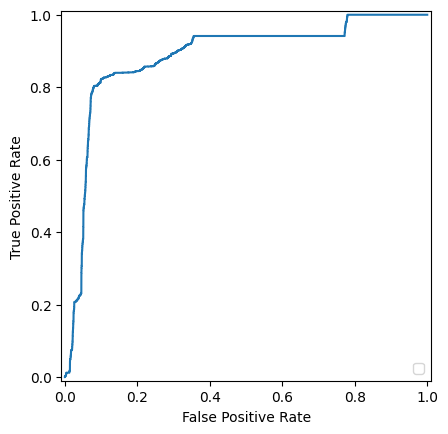

In [65]:
from sklearn.metrics import RocCurveDisplay, roc_curve

y_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [66]:
from sklearn.metrics import roc_auc_score

y_pred_proba = clf_tree.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_proba[:,1]))

0.930947794938807


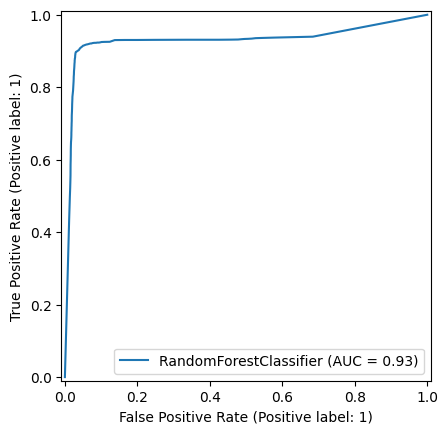

In [67]:
clf_tree_disp = RocCurveDisplay.from_estimator(clf_tree, X_test, y_test)
plt.show()

In [68]:
neigh_tree_disp = RocCurveDisplay.from_estimator(neigh, X_test, y_test)
plt.show()

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

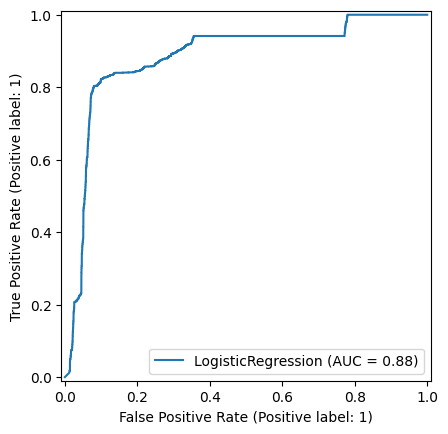

In [69]:
clf_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

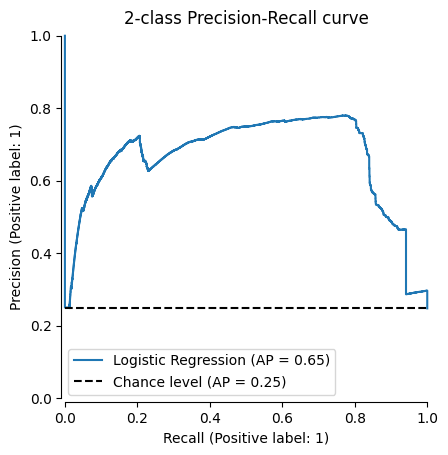

In [70]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name = "Logistic Regression", plot_chance_level=True, despine=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [71]:
display = PrecisionRecallDisplay.from_estimator(
    neigh, X_test, y_test, name = "KNN", plot_chance_level=True, despine=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

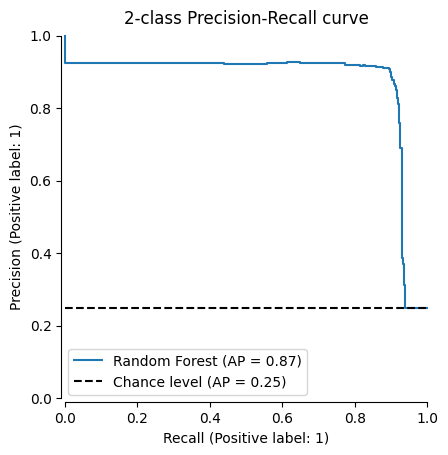

In [72]:
display = PrecisionRecallDisplay.from_estimator(
    clf_tree, X_test, y_test, name = "Random Forest", plot_chance_level=True, despine=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

Our findings are [here.](https://docs.google.com/presentation/d/1c9dIvLE3F2Mx3Tn9X3jVn3NBVLQeT1evCX8y_jj8QjI/edit?slide=id.g3a3b4775ea9_0_0#slide=id.g3a3b4775ea9_0_0)